
# 03 — EDA with Data Visualization

Using artifacts from `01_data-collection-api` and `02_data-wrangling` to generate all required plots.

**Inputs**
- `data/launches_clean.csv` (primary)
- `data/launches_summary.csv` (per-launch aggregate payload)

**Outputs (saved to `./artifacts`)**
1. `(01) Flight Number vs Launch Site`
2. `(02) Payload vs Launch Site`
3. `(03) Flight Number vs Orbit Type`
4. `(04) Payload vs Orbit Type`
5. `(05) Success Rate vs Orbit Type`
6. `(06) Yearly Average Success Rate`


## Setup

In [4]:

# If needed:
# !pip install pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set(style="whitegrid")
ARTIFACTS_DIR = Path("./artifacts")
DATA_DIR = Path("./data")
ARTIFACTS_DIR.mkdir(exist_ok=True, parents=True)

clean_path = DATA_DIR / "launches_clean.csv"
summ_path  = DATA_DIR / "launches_summary.csv"
assert clean_path.exists(), "Missing data/launches_clean.csv — run previous notebooks."
assert summ_path.exists(), "Missing data/launches_summary.csv — run previous notebooks."

df = pd.read_csv(clean_path, parse_dates=["date_utc"], dtype={"flight_number": "Int64", "year":"Int64"})
df_summ = pd.read_csv(summ_path, parse_dates=["date_utc"], dtype={"flight_number": "Int64", "year":"Int64"})

# Launch-level helper (one row per flight)
df_launch = (df_summ[["flight_number","date_utc","year","launch_site","launch_success","total_payload_mass_kg"]]
             .drop_duplicates(subset=["flight_number"])
             .sort_values("flight_number"))
df_launch["launch_success"] = df_launch["launch_success"].astype("boolean")

# Useful typed columns
df["payload_mass_kg"] = pd.to_numeric(df["payload_mass_kg"], errors="coerce")
df["orbit"] = df["orbit"].astype(str)
df["launch_site"] = df["launch_site"].astype(str)

df.head(3), df_launch.head(3)


(   flight_number                  date_utc  year        date   launch_site  \
 0              6 2010-06-04 18:45:00+00:00  2010  2010-06-04  CCSFS SLC 40   
 1              7 2010-12-08 15:43:00+00:00  2010  2010-12-08  CCSFS SLC 40   
 2              7 2010-12-08 15:43:00+00:00  2010  2010-12-08  CCSFS SLC 40   
 
   site_region   site_locality   site_lat   site_lon rocket_name  ...  \
 0     Florida  Cape Canaveral  28.561857 -80.577366    Falcon 9  ...   
 1     Florida  Cape Canaveral  28.561857 -80.577366    Falcon 9  ...   
 2     Florida  Cape Canaveral  28.561857 -80.577366    Falcon 9  ...   
 
   launch_success  landing_outcome landing_outcome_kind  \
 0           True       No attempt           no_attempt   
 1           True       No attempt           no_attempt   
 2           True       No attempt           no_attempt   
 
                  payload_id               payload_name payload_mass_kg orbit  \
 0  5eb0e4b7b6c3bb0006eeb1e7  Dragon Qualification Unit             N

## (01) Flight Number vs Launch Site

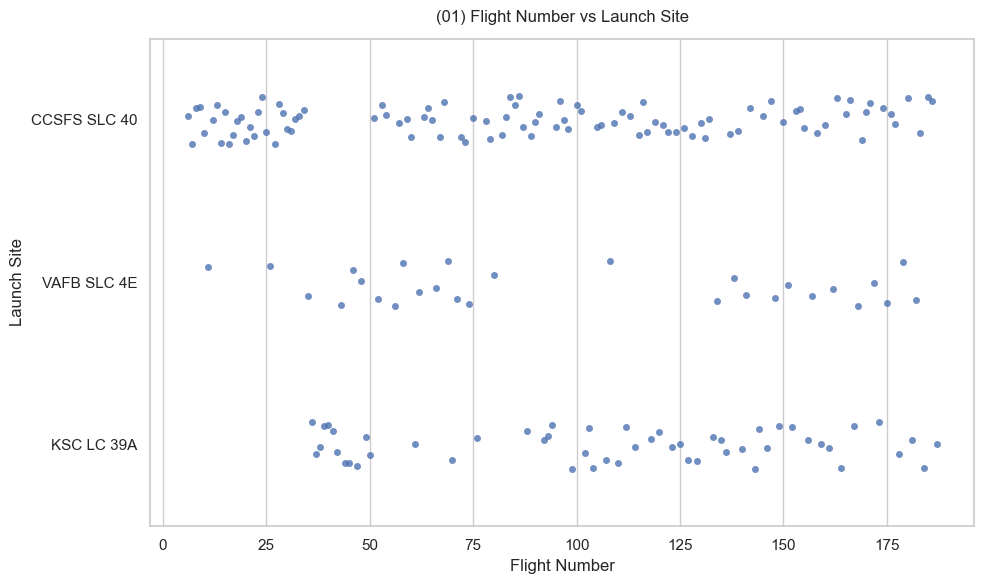

Saved: /Users/johnpaulsandiego/Desktop/kData/data-science-capstone/artifacts/(01)_flightnumber_vs_launchsite.png


In [6]:

plt.figure(figsize=(10,6))
ax = sns.stripplot(
    data=df_launch,
    x="flight_number", y="launch_site",
    size=5, alpha=0.8, jitter=0.15, orient="h"
)
ax.set_title("(01) Flight Number vs Launch Site", pad=12)
ax.set_xlabel("Flight Number")
ax.set_ylabel("Launch Site")
plt.tight_layout()
out = ARTIFACTS_DIR / "(01)_flightnumber_vs_launchsite.png"
plt.savefig(out, dpi=180)
plt.show()
print(f"Saved: {out.resolve()}")



**Explanation (template):**  
Later flights cluster at specific sites (e.g., SLC‑40 and LC‑39A). This view helps confirm site usage over time and highlights any site transitions.


## (02) Payload vs Launch Site

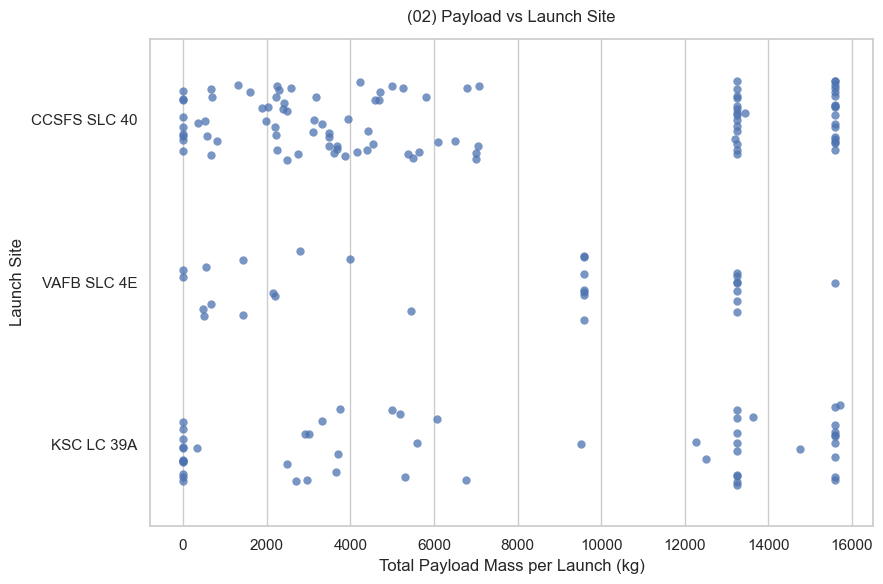

Saved: /Users/johnpaulsandiego/Desktop/kData/data-science-capstone/artifacts/(02)_payload_vs_launchsite.png


In [11]:

plt.figure(figsize=(9,6))
ax = sns.stripplot(
    data=df_launch,
    x="total_payload_mass_kg", y="launch_site",
    size=6, jitter=0.25, alpha=0.75, orient="h"
)
ax.set_title("(02) Payload vs Launch Site", pad=12)
ax.set_xlabel("Total Payload Mass per Launch (kg)")
ax.set_ylabel("Launch Site")
plt.tight_layout()
out = ARTIFACTS_DIR / "(02)_payload_vs_launchsite.png"
plt.savefig(out, dpi=180)
plt.show()
print(f"Saved: {out.resolve()}")



**Explanation (template):**  
Different launch sites service different payload mass profiles. Heavier missions may concentrate at a given site due to pad/trajectory suitability.


## (03) Flight Number vs Orbit Type

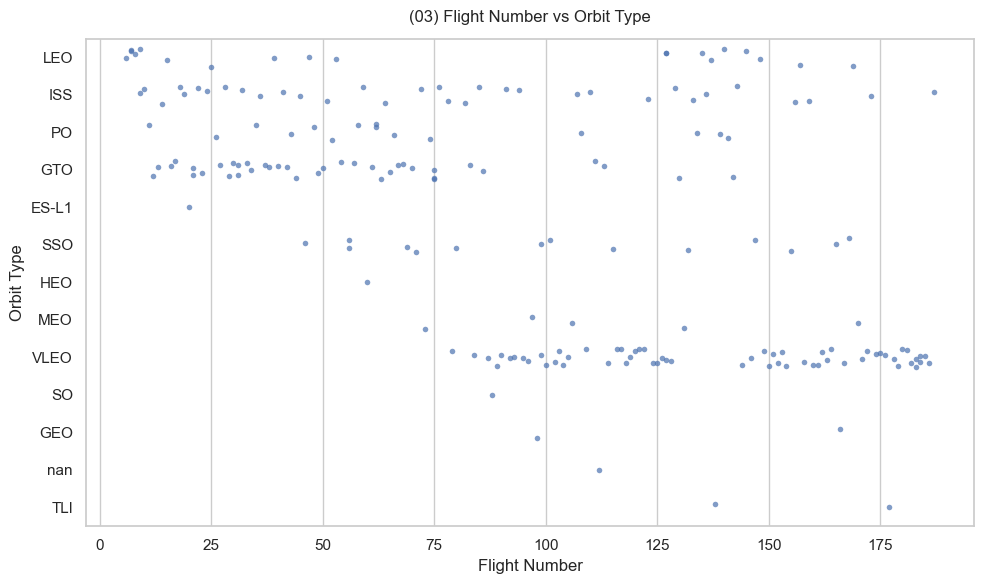

Saved: /Users/johnpaulsandiego/Desktop/kData/data-science-capstone/artifacts/(03)_flightnumber_vs_orbit.png


In [15]:

df_orbit_f = df.dropna(subset=["orbit","flight_number"]).copy()
plt.figure(figsize=(10,6))
ax = sns.stripplot(
    data=df_orbit_f, x="flight_number", y="orbit",
    size=4, alpha=0.7, jitter=0.25
)
ax.set_title("(03) Flight Number vs Orbit Type", pad=12)
ax.set_xlabel("Flight Number")
ax.set_ylabel("Orbit Type")
plt.tight_layout()
out = ARTIFACTS_DIR / "(03)_flightnumber_vs_orbit.png"
plt.savefig(out, dpi=180)
plt.show()
print(f"Saved: {out.resolve()}")



**Explanation (template):**  
Orbit diversity can be seen across the timeline. Clusters indicate periods where missions targeted similar orbits (e.g., LEO for Starlink, GTO for comsats).


## (04) Payload vs Orbit Type

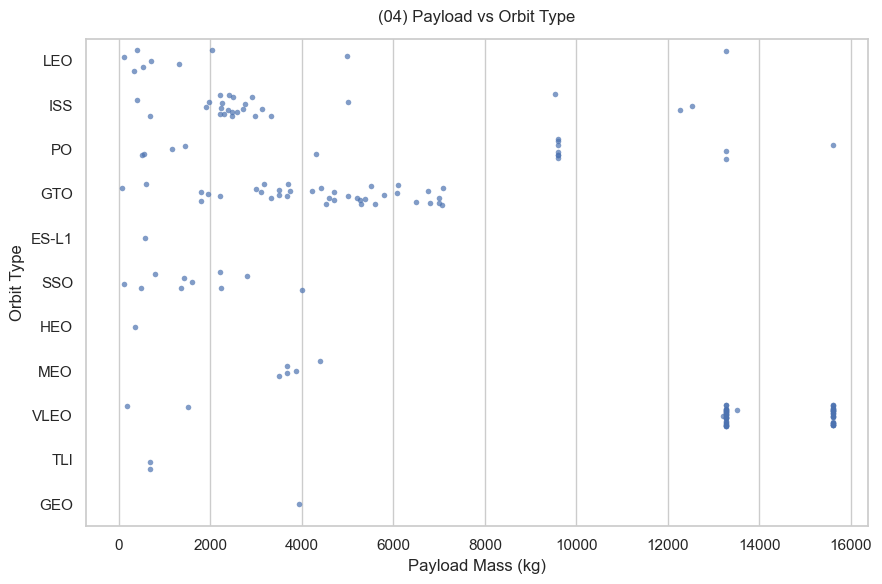

Saved: /Users/johnpaulsandiego/Desktop/kData/data-science-capstone/artifacts/(04)_payload_vs_orbit.png


In [19]:

df_payload_orbit = df.dropna(subset=["payload_mass_kg","orbit"]).copy()
plt.figure(figsize=(9,6))
ax = sns.stripplot(
    data=df_payload_orbit, x="payload_mass_kg", y="orbit",
    size=4, alpha=0.7, jitter=0.25, orient="h"
)
ax.set_title("(04) Payload vs Orbit Type", pad=12)
ax.set_xlabel("Payload Mass (kg)")
ax.set_ylabel("Orbit Type")
plt.tight_layout()
out = ARTIFACTS_DIR / "(04)_payload_vs_orbit.png"
plt.savefig(out, dpi=180)
plt.show()
print(f"Saved: {out.resolve()}")



**Explanation (template):**  
Certain orbits are associated with distinct payload mass bands (e.g., heavier GTO missions vs lighter LEO rideshares). Outliers highlight unusually heavy/low-mass cases.


## (05) Success Rate vs Orbit Type

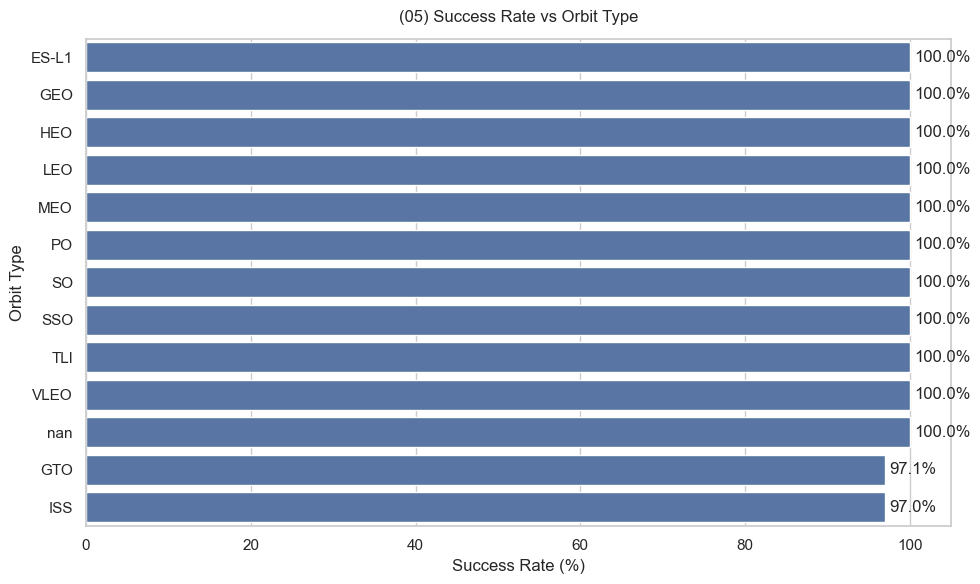

Saved: /Users/johnpaulsandiego/Desktop/kData/data-science-capstone/artifacts/(05)_success_rate_vs_orbit.png


In [23]:

launch_orbit = df[['flight_number','orbit','launch_success']].drop_duplicates(subset=['flight_number','orbit'])
sr_by_orbit = (launch_orbit.groupby('orbit', dropna=True)['launch_success']
               .mean().mul(100).sort_values(ascending=False).rename('success_rate_pct'))
sr_df = sr_by_orbit.reset_index()

plt.figure(figsize=(10,6))
ax = sns.barplot(data=sr_df, x='success_rate_pct', y='orbit')
ax.set_title("(05) Success Rate vs Orbit Type", pad=12)
ax.set_xlabel("Success Rate (%)")
ax.set_ylabel("Orbit Type")
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.5, p.get_y()+p.get_height()/2, f"{width:.1f}%", va='center')
plt.tight_layout()
out = ARTIFACTS_DIR / "(05)_success_rate_vs_orbit.png"
plt.savefig(out, dpi=180)
plt.show()
print(f"Saved: {out.resolve()}")



**Explanation (template):**  
Overall success rates are high across most orbits, with minor variation by mission profile. This informs risk profiles for different mission types.


## (06) Yearly Average Success Rate

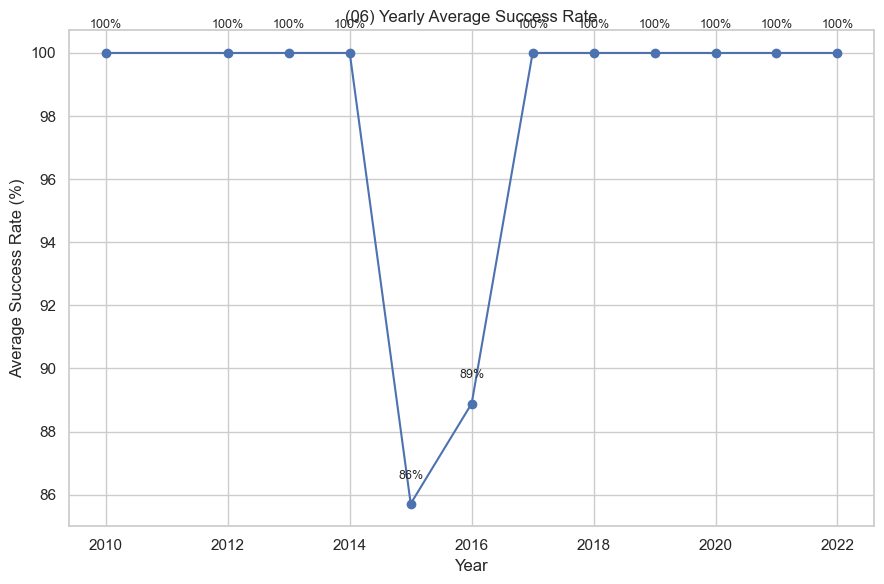

Saved: /Users/johnpaulsandiego/Desktop/kData/data-science-capstone/artifacts/(06)_yearly_avg_success_rate.png


In [27]:

yr = df_launch[['year','launch_success']].dropna()
rate_by_year = (yr.groupby('year')['launch_success'].mean().mul(100).reset_index())
plt.figure(figsize=(9,6))
plt.plot(rate_by_year['year'], rate_by_year['launch_success'], marker='o')
plt.title("(06) Yearly Average Success Rate")
plt.xlabel("Year")
plt.ylabel("Average Success Rate (%)")
for _, r in rate_by_year.iterrows():
    plt.text(r['year'], r['launch_success']+0.7, f"{r['launch_success']:.0f}%",
             ha='center', va='bottom', fontsize=9)
plt.tight_layout()
out = Path("./artifacts") / "(06)_yearly_avg_success_rate.png"
plt.savefig(out, dpi=180)
plt.show()
print(f"Saved: {out.resolve()}")



**Explanation (template):**  
A clear upward trend reflects vehicle maturation (e.g., transition to Block 5). Year-over-year improvements stabilize at high reliability.
